In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting for Jupyter note.
%matplotlib inline

In [7]:
transform = transforms.ToTensor()

In [8]:
train_data_set = datasets.MNIST(root='Home Work', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='Home Work', train=False, download=True, transform=transform)

In [9]:
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: Home Work
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: Home Work
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
# Define batch sizes for training and testing
batch_sizes = [64, 1024]

# Create DataLoader objects for the training and test datasets with batch size 64.
train_loader_small = DataLoader(train_data_set, batch_size=batch_sizes[0], shuffle=True)
test_loader_small = DataLoader(test_data_set, batch_size=batch_sizes[0], shuffle=True)

# Create DataLoader objects for the training and test datasets with batch size 1024.
train_loader_large = DataLoader(train_data_set, batch_size=batch_sizes[1], shuffle=True)
test_loader_large = DataLoader(test_data_set, batch_size=batch_sizes[1], shuffle=True)


In [13]:
# Function to calculate the total number of trainable parameters in a given model
def calculate_trainable_params(model):
    total_trainable_params = sum(param.numel() for param in model.parameters() if param.requires_grad)
    return total_trainable_params


In [14]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleFeedforwardNN(nn.Module):
    def __init__(self, input_size=784, hidden_size1=20, hidden_size2=40, output_size=10):
        super(SimpleFeedforwardNN, self).__init__()
        # Defining the layers of the model
        self.fc1 = nn.Linear(input_size, hidden_size1)    
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.output_layer = nn.Linear(hidden_size2, output_size)
        
    def forward(self, x):
        # Forward pass through the layers with ReLU activations
        x = F.relu(self.fc1(x))  # ReLU after first layer
        x = F.relu(self.fc2(x))  # ReLU after second layer
        x = self.output_layer(x) # Output layer (no activation applied)
        return x


In [16]:
model1 = SimpleFeedforwardNN()  # Instantiates  SimpleFeedforwardNN class


In [17]:
model1params = calculate_trainable_params(model1)  
print(f"Total number of trainable parameters in model1: {model1params}")


Total number of trainable parameters in model1: 16950


In [19]:
# Define the loss function for classification
criterion = nn.CrossEntropyLoss()


In [22]:
# Initialize the optimizer for model1
adam_optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)


In [25]:
epochs = 10
train_correct = []
test_correct = []
train_losses = []
test_losses = []

for epoch in range(epochs):
    train_correct_count = 0
    test_correct_count = 0

    for batch_idx, (X_train, y_train) in enumerate(train_loader_small):
        
        y_pred = model1(X_train.view(-1, 784))
        train_loss = criterion(y_pred, y_train)
        
        predicted_labels = torch.max(y_pred.data, 1)[1]
        batch_correct = (predicted_labels == y_train).sum()
        train_correct_count += batch_correct
        
        adam_optimizer.zero_grad()
        train_loss.backward()
        adam_optimizer.step()
    
    train_losses.append(train_loss.item())
    train_correct.append(train_correct_count)
    
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader_small):
            
            y_val = model1(X_test.view(-1, 784))
            
            predicted_labels = torch.max(y_val.data, 1)[1]
            test_correct_count += (predicted_labels == y_test).sum()
    
    test_loss = criterion(y_val, y_test)
    test_losses.append(test_loss.item())
    test_correct.append(test_correct_count)

    # Calculating accuracy.
    train_accuracy = train_correct_count / len(train_data_set) * 100
    test_accuracy = test_correct_count / len(test_data_set) * 100

    # Print epoch details.
    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {train_loss.item():.4f}, Train Correct: {train_correct_count}, '
          f'Test Loss: {test_loss.item():.4f}, Test Correct: {test_correct_count}, '
          f'Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1/10, Train Loss: 0.0398, Train Correct: 58768, Test Loss: 0.2238, Test Correct: 9664, Train Accuracy: 97.95%, Test Accuracy: 96.64%
Epoch 2/10, Train Loss: 0.0070, Train Correct: 58877, Test Loss: 0.0628, Test Correct: 9678, Train Accuracy: 98.13%, Test Accuracy: 96.78%
Epoch 3/10, Train Loss: 0.0108, Train Correct: 58883, Test Loss: 0.0884, Test Correct: 9680, Train Accuracy: 98.14%, Test Accuracy: 96.80%
Epoch 4/10, Train Loss: 0.0196, Train Correct: 58914, Test Loss: 0.4977, Test Correct: 9681, Train Accuracy: 98.19%, Test Accuracy: 96.81%
Epoch 5/10, Train Loss: 0.1692, Train Correct: 58983, Test Loss: 0.3187, Test Correct: 9659, Train Accuracy: 98.31%, Test Accuracy: 96.59%
Epoch 6/10, Train Loss: 0.0064, Train Correct: 59002, Test Loss: 0.1278, Test Correct: 9667, Train Accuracy: 98.34%, Test Accuracy: 96.67%
Epoch 7/10, Train Loss: 0.0664, Train Correct: 59010, Test Loss: 0.1488, Test Correct: 9666, Train Accuracy: 98.35%, Test Accuracy: 96.66%
Epoch 8/10, Train Loss: 0.0

In [26]:
train_loss_list=[]

In [31]:
for i in range(len(train_losses)):
    train_loss_list.append(train_losses[i])


In [32]:
test_loss_list=[]

In [39]:
for i in range(len(test_losses)):
     test_loss_list.append(test_losses[i])

In [40]:
train_accuracy_list=[]

In [41]:
for i in range(len(train_correct)):
     train_accuracy_list.append(train_correct[i].detach().numpy()/600)

In [42]:
test_accuracy_list=[]

In [44]:
for i in range(len(test_correct)):
     test_accuracy_list.append(test_correct[i].detach().numpy()/100)

In [22]:
####################################------Moodel 2 with batch size 1024--------###################################

In [45]:
import torch.nn as nn
import torch.nn.functional as F

class FeedforwardNN(nn.Module):
    def __init__(self, input_size=784, hidden_size1=20, hidden_size2=40, output_size=10):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.output_layer = nn.Linear(hidden_size2, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [46]:
model2 = FeedforwardNN()  # Instantiate the rephrased FeedforwardNN class


In [47]:
model2params = calculate_trainable_params(model2)  # Using the rephrased calculate_trainable_params function
print(f"Total number of trainable parameters in model2: {model2params}")


Total number of trainable parameters in model2: 16950


In [48]:
model2

FeedforwardNN(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=40, bias=True)
  (output_layer): Linear(in_features=40, out_features=10, bias=True)
)

In [50]:

criterion2 = nn.CrossEntropyLoss()


In [51]:

adam_optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)


In [52]:
epochs = 10
train_losses2 = []
test_losses2 = []
train_correct2 = []
test_correct2 = []

for epoch in range(epochs):
    train_correct_count = 0
    test_correct_count = 0

    for batch_idx, (X_train, y_train) in enumerate(train_loader_large):
        
        y_pred = model2(X_train.view(-1, 784))
        train_loss = criterion2(y_pred, y_train)
        
        predicted_labels = torch.max(y_pred.data, 1)[1]
        batch_correct = (predicted_labels == y_train).sum()
        train_correct_count += batch_correct
        
        adam_optimizer2.zero_grad()
        train_loss.backward()
        adam_optimizer2.step()
    
    train_losses2.append(train_loss.item())
    train_correct2.append(train_correct_count)
    
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader_large):
            
            y_val = model2(X_test.view(-1, 784))
            
            predicted_labels = torch.max(y_val.data, 1)[1]
            test_correct_count += (predicted_labels == y_test).sum()
    
    test_loss = criterion2(y_val, y_test)
    test_losses2.append(test_loss.item())
    test_correct2.append(test_correct_count)

    train_accuracy = train_correct_count / len(train_data_set) * 100
    test_accuracy = test_correct_count / len(test_data_set) * 100

    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {train_loss.item():.4f}, Train Correct: {train_correct_count}, '
          f'Test Loss: {test_loss.item():.4f}, Test Correct: {test_correct_count}, '
          f'Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1/10, Train Loss: 1.0077, Train Correct: 32222, Test Loss: 0.9007, Test Correct: 8093, Train Accuracy: 53.70%, Test Accuracy: 80.93%
Epoch 2/10, Train Loss: 0.5082, Train Correct: 50554, Test Loss: 0.4836, Test Correct: 8825, Train Accuracy: 84.26%, Test Accuracy: 88.25%
Epoch 3/10, Train Loss: 0.3311, Train Correct: 53349, Test Loss: 0.3536, Test Correct: 9030, Train Accuracy: 88.92%, Test Accuracy: 90.30%
Epoch 4/10, Train Loss: 0.3108, Train Correct: 54286, Test Loss: 0.2857, Test Correct: 9126, Train Accuracy: 90.48%, Test Accuracy: 91.26%
Epoch 5/10, Train Loss: 0.3455, Train Correct: 54806, Test Loss: 0.2977, Test Correct: 9193, Train Accuracy: 91.34%, Test Accuracy: 91.93%
Epoch 6/10, Train Loss: 0.2875, Train Correct: 55248, Test Loss: 0.2638, Test Correct: 9264, Train Accuracy: 92.08%, Test Accuracy: 92.64%
Epoch 7/10, Train Loss: 0.2472, Train Correct: 55493, Test Loss: 0.2398, Test Correct: 9272, Train Accuracy: 92.49%, Test Accuracy: 92.72%
Epoch 8/10, Train Loss: 0.2

In [53]:
for i in range(len(train_losses2)):  # Update to train_losses2 if using the rephrased version
    train_loss_list.append(train_losses2[i])


In [54]:
for i in range(len(test_losses2)):  # Update to test_losses2 if using the rephrased version
    test_loss_list.append(test_losses2[i])


In [55]:
for i in range(len(train_correct2)):  # Update to train_correct2 if using the rephrased version
    train_accuracy_list.append(train_correct2[i] / 600)


In [57]:
for i in range(len(test_correct2)):
     test_accuracy_list.append(test_correct2[i].detach().numpy()/100)

In [58]:
import numpy as np


alpa = np.linspace(-1.0, 2.0, num=20)
thetaArr = []


params1 = list(model1.parameters())
params2 = list(model2.parameters())


for i in range(len(alpa)):
    interpolated_params = []
    for param1, param2 in zip(params1, params2):
        theta = (1 - alpa[i]) * param1 + alpa[i] * param2
        interpolated_params.append(theta)
    thetaArr.append(interpolated_params)


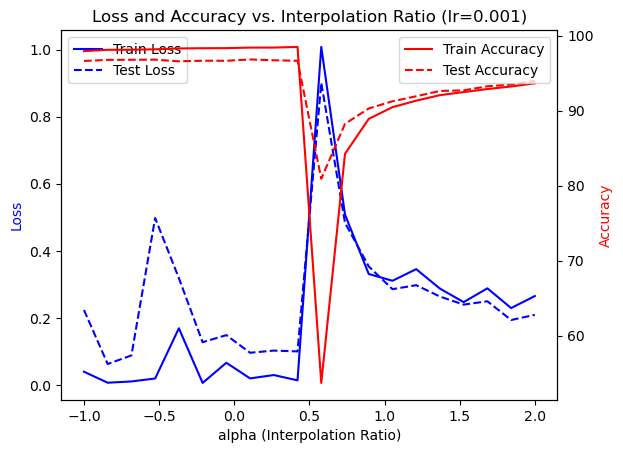

In [60]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(alpa, train_loss_list, 'b', label='Train Loss')
ax1.plot(alpa, test_loss_list, 'b--', label='Test Loss')

ax2.plot(alpa, train_accuracy_list, 'r', label='Train Accuracy')
ax2.plot(alpa, test_accuracy_list, 'r--', label='Test Accuracy')

ax1.set_title('Loss and Accuracy vs. Interpolation Ratio (lr=0.001)')
ax1.set_xlabel('alpha (Interpolation Ratio)')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Accuracy', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [36]:
###########################---------Models with lr=0.01---------######################### 

In [61]:
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardModel(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=20, hidden_layer2=40, output_size=10):
        super(FeedForwardModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [62]:
model_one = FeedForwardModel() 

In [63]:
criterion_one = nn.CrossEntropyLoss()


In [64]:
adam_optimizer_one = torch.optim.Adam(model_one.parameters(), lr=0.01)


In [66]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


transform = transforms.ToTensor()
train_data_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader1 = DataLoader(train_data_set, batch_size=64, shuffle=True)
test_loader1 = DataLoader(test_data_set, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 45383822.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 4965798.71it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 19242345.50it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7574762.93it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [67]:
epochs = 10
train_correct_one = []
test_correct_one = []
train_losses_one = []
test_losses_one = []

for epoch in range(epochs):
    train_correct_count = 0
    test_correct_count = 0

    for batch_idx, (X_train, y_train) in enumerate(train_loader1):
        
        y_pred = model_one(X_train.view(-1, 784))
        train_loss = criterion_one(y_pred, y_train)
        
        predicted_labels = torch.max(y_pred.data, 1)[1]
        batch_correct = (predicted_labels == y_train).sum()
        train_correct_count += batch_correct
        
        adam_optimizer_one.zero_grad()
        train_loss.backward()
        adam_optimizer_one.step()
    
    train_losses_one.append(train_loss.item())
    train_correct_one.append(train_correct_count)
    
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader1):
            
            y_val = model_one(X_test.view(-1, 784))
            
            predicted_labels = torch.max(y_val.data, 1)[1]
            test_correct_count += (predicted_labels == y_test).sum()
    
    test_loss = criterion_one(y_val, y_test)
    test_losses_one.append(test_loss.item())
    test_correct_one.append(test_correct_count)

    train_accuracy = train_correct_count / len(train_data_set) * 100
    test_accuracy = test_correct_count / len(test_data_set) * 100

    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {train_loss.item():.4f}, Train Correct: {train_correct_count}, '
          f'Test Loss: {test_loss.item():.4f}, Test Correct: {test_correct_count}, '
          f'Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1/10, Train Loss: 0.2648, Train Correct: 53991, Test Loss: 0.1231, Test Correct: 9300, Train Accuracy: 89.99%, Test Accuracy: 93.00%
Epoch 2/10, Train Loss: 0.2099, Train Correct: 56112, Test Loss: 0.2798, Test Correct: 9415, Train Accuracy: 93.52%, Test Accuracy: 94.15%
Epoch 3/10, Train Loss: 0.0365, Train Correct: 56514, Test Loss: 0.0415, Test Correct: 9377, Train Accuracy: 94.19%, Test Accuracy: 93.77%
Epoch 4/10, Train Loss: 0.1746, Train Correct: 56674, Test Loss: 0.2380, Test Correct: 9444, Train Accuracy: 94.46%, Test Accuracy: 94.44%
Epoch 5/10, Train Loss: 0.0812, Train Correct: 56894, Test Loss: 0.0710, Test Correct: 9354, Train Accuracy: 94.82%, Test Accuracy: 93.54%
Epoch 6/10, Train Loss: 0.2556, Train Correct: 56992, Test Loss: 0.0043, Test Correct: 9477, Train Accuracy: 94.99%, Test Accuracy: 94.77%
Epoch 7/10, Train Loss: 0.3216, Train Correct: 57080, Test Loss: 0.2415, Test Correct: 9450, Train Accuracy: 95.13%, Test Accuracy: 94.50%
Epoch 8/10, Train Loss: 0.2

In [68]:
train_loss_list=[]

In [70]:
for i in range(len(train_losses_one)):  # Assuming you're using the rephrased version
    train_loss_list.append(train_losses_one[i])


In [71]:
test_loss_list=[]

In [73]:
for i in range(len(test_losses_one)):
     test_loss_list.append(test_losses_one[i])

In [74]:
train_accuracy_list=[]

In [75]:
for i in range(len(train_correct_one)):
     train_accuracy_list.append(train_correct_one[i])

In [76]:
test_accuracy_list=[]

In [77]:
for i in range(len(test_correct_one)):  # Assuming you're using the rephrased version
    test_accuracy_list.append(test_correct_one[i] / 100)  # Adjust the denominator to match your dataset


In [50]:
#################-----Model 2 with lr=0.01---------######################

In [78]:
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardModelTwo(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=20, hidden_layer2=40, output_size=10):
        super(FeedForwardModelTwo, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [79]:
model_two = FeedForwardModelTwo()  


In [80]:
criterion_two = nn.CrossEntropyLoss()


In [81]:
adam_optimizer_two = torch.optim.Adam(model_two.parameters(), lr=0.01)


In [84]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformation to convert images to PyTorch tensors
transform = transforms.ToTensor()

# Load the MNIST dataset for training and testing
train_data_set2 = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data_set2 = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader for training and test datasets
train_loader2 = DataLoader(train_data_set2, batch_size=64, shuffle=True)
test_loader2 = DataLoader(test_data_set2, batch_size=64, shuffle=False)


In [85]:
epochs = 10
train_correct_two = []
test_correct_two = []
train_losses_two = []
test_losses_two = []

for epoch in range(epochs):
    train_correct_count = 0
    test_correct_count = 0

    for batch_idx, (X_train, y_train) in enumerate(train_loader2):
        
        y_pred = model_two(X_train.view(-1, 784))
        train_loss = criterion_two(y_pred, y_train)
        
        predicted_labels = torch.max(y_pred.data, 1)[1]
        batch_correct = (predicted_labels == y_train).sum()
        train_correct_count += batch_correct
        
        adam_optimizer_two.zero_grad()
        train_loss.backward()
        adam_optimizer_two.step()
    
    train_losses_two.append(train_loss.item())  # Save the training loss for this epoch
    train_correct_two.append(train_correct_count)  # Save the correct predictions for this epoch
    
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader2):
            
            y_val = model_two(X_test.view(-1, 784))
            
            predicted_labels = torch.max(y_val.data, 1)[1]
            test_correct_count += (predicted_labels == y_test).sum()
    
    test_loss = criterion_two(y_val, y_test)
    test_losses_two.append(test_loss.item())  # Save the test loss for this epoch
    test_correct_two.append(test_correct_count)  # Save the correct predictions for this epoch

    train_accuracy = train_correct_count / len(train_data_set) * 100
    test_accuracy = test_correct_count / len(test_data_set) * 100

    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {train_loss.item():.4f}, Train Correct: {train_correct_count}, '
          f'Test Loss: {test_loss.item():.4f}, Test Correct: {test_correct_count}, '
          f'Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1/10, Train Loss: 0.1718, Train Correct: 54493, Test Loss: 0.2297, Test Correct: 9256, Train Accuracy: 90.82%, Test Accuracy: 92.56%
Epoch 2/10, Train Loss: 0.0844, Train Correct: 56558, Test Loss: 0.2444, Test Correct: 9400, Train Accuracy: 94.26%, Test Accuracy: 94.00%
Epoch 3/10, Train Loss: 0.1904, Train Correct: 57049, Test Loss: 0.0071, Test Correct: 9525, Train Accuracy: 95.08%, Test Accuracy: 95.25%
Epoch 4/10, Train Loss: 0.1073, Train Correct: 57235, Test Loss: 0.0174, Test Correct: 9514, Train Accuracy: 95.39%, Test Accuracy: 95.14%
Epoch 5/10, Train Loss: 0.0559, Train Correct: 57416, Test Loss: 0.0293, Test Correct: 9518, Train Accuracy: 95.69%, Test Accuracy: 95.18%
Epoch 6/10, Train Loss: 0.3567, Train Correct: 57500, Test Loss: 0.0377, Test Correct: 9565, Train Accuracy: 95.83%, Test Accuracy: 95.65%
Epoch 7/10, Train Loss: 0.3764, Train Correct: 57521, Test Loss: 0.0030, Test Correct: 9541, Train Accuracy: 95.87%, Test Accuracy: 95.41%
Epoch 8/10, Train Loss: 0.0

In [100]:
for i in range(len(train_losses_two)):  
    train_loss_list.append(train_losses_two[i])


In [101]:
for i in range(len(test_losses_two)):  
    test_loss_list.append(test_losses_two[i])


In [102]:
for i in range(len(train_correct_two)):  
    train_accuracy_list.append(train_correct_two[i] ) 


In [103]:
for i in range(len(test_correct_two)):  
    test_accuracy_list.append(test_correct_two[i] )  

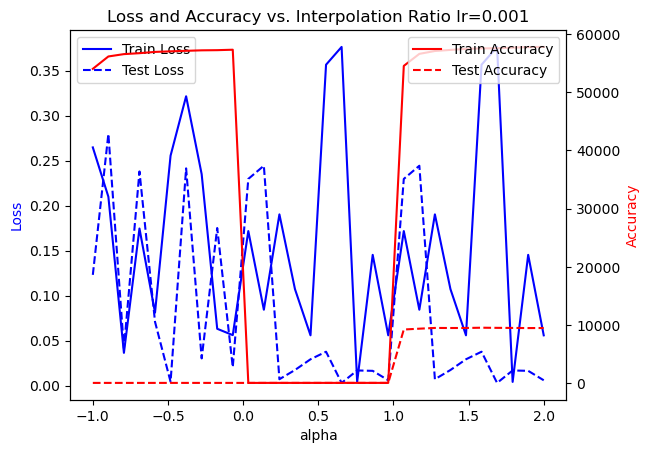

In [104]:
# Rescale 'alpa' to match the length of your lists (10 elements)
alpa_rescaled = np.linspace(-1.0, 2.0, num=len(train_loss_list))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(alpa_rescaled, train_loss_list, 'b', label='Train Loss')
ax1.plot(alpa_rescaled, test_loss_list, 'b--', label='Test Loss')

ax2.plot(alpa_rescaled, train_accuracy_list, 'r', label='Train Accuracy')
ax2.plot(alpa_rescaled, test_accuracy_list, 'r--', label='Test Accuracy')

ax1.set_title('Loss and Accuracy vs. Interpolation Ratio lr=0.001')
ax1.set_xlabel('alpha')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Accuracy', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
